In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dt_unclean = pd.read_excel("./data/for_textclassification_data.xlsx")

In [4]:
df = dt_unclean.dropna(subset=["Comment"])


In [5]:
# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
embeddings = np.load("./embeddings/bert_embeddings.npy", allow_pickle=True)

In [7]:
# Combine the embeddings into a feature matrix
X = torch.cat(embeddings.tolist()).numpy()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["group"], test_size=0.25, random_state=42)

In [9]:
df["group"]

5        technical-statements
14       technical-statements
23          technical-logging
27          technical-logging
29          technical-logging
                 ...         
14101                       0
14102                       0
14104                       0
14115                       0
14126                       0
Name: group, Length: 1785, dtype: object

In [21]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multi-class SVM model
svm_model = SVC(kernel='linear', decision_function_shape='ovr', C=0.8)
svm_model.fit(X_train, y_train)



SVC(C=0.8, kernel='linear')

In [22]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                                        precision    recall  f1-score   support

                                     0       0.80      0.90      0.85       248
                       content-clarity       0.24      0.40      0.30        10
                   content-findability       0.77      0.42      0.54        24
          content-insufficient content       0.27      0.30      0.29        10
                         content-loans       0.00      0.00      0.00         2
                        content-paylah       1.00      1.00      1.00         1
                        content-paynow       0.00      0.00      0.00         3
                         design-design       0.22      0.12      0.15        17
                     enquiries-account       0.62      0.77      0.69        13
                      enquiries-branch       0.00      0.00      0.00         3
                       enquiries-email       0.36      0.42      0.38        12
                  enquiries-fee waiver 

C:\Users\Xavior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Xavior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Xavior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1

In [ ]:
#the precision is 0.81, which means that 81% of the items predicted as "0" were actually "0."
# the recall is 0.91, indicating that 91% of the actual "0" instances were correctly classified.
# the F1-score is 0.85, which balances precision and recall for that class.
#the support is 206, meaning there are 206 instances of class "0" in the dataset.

In [24]:
class_labels = df["group"].unique()

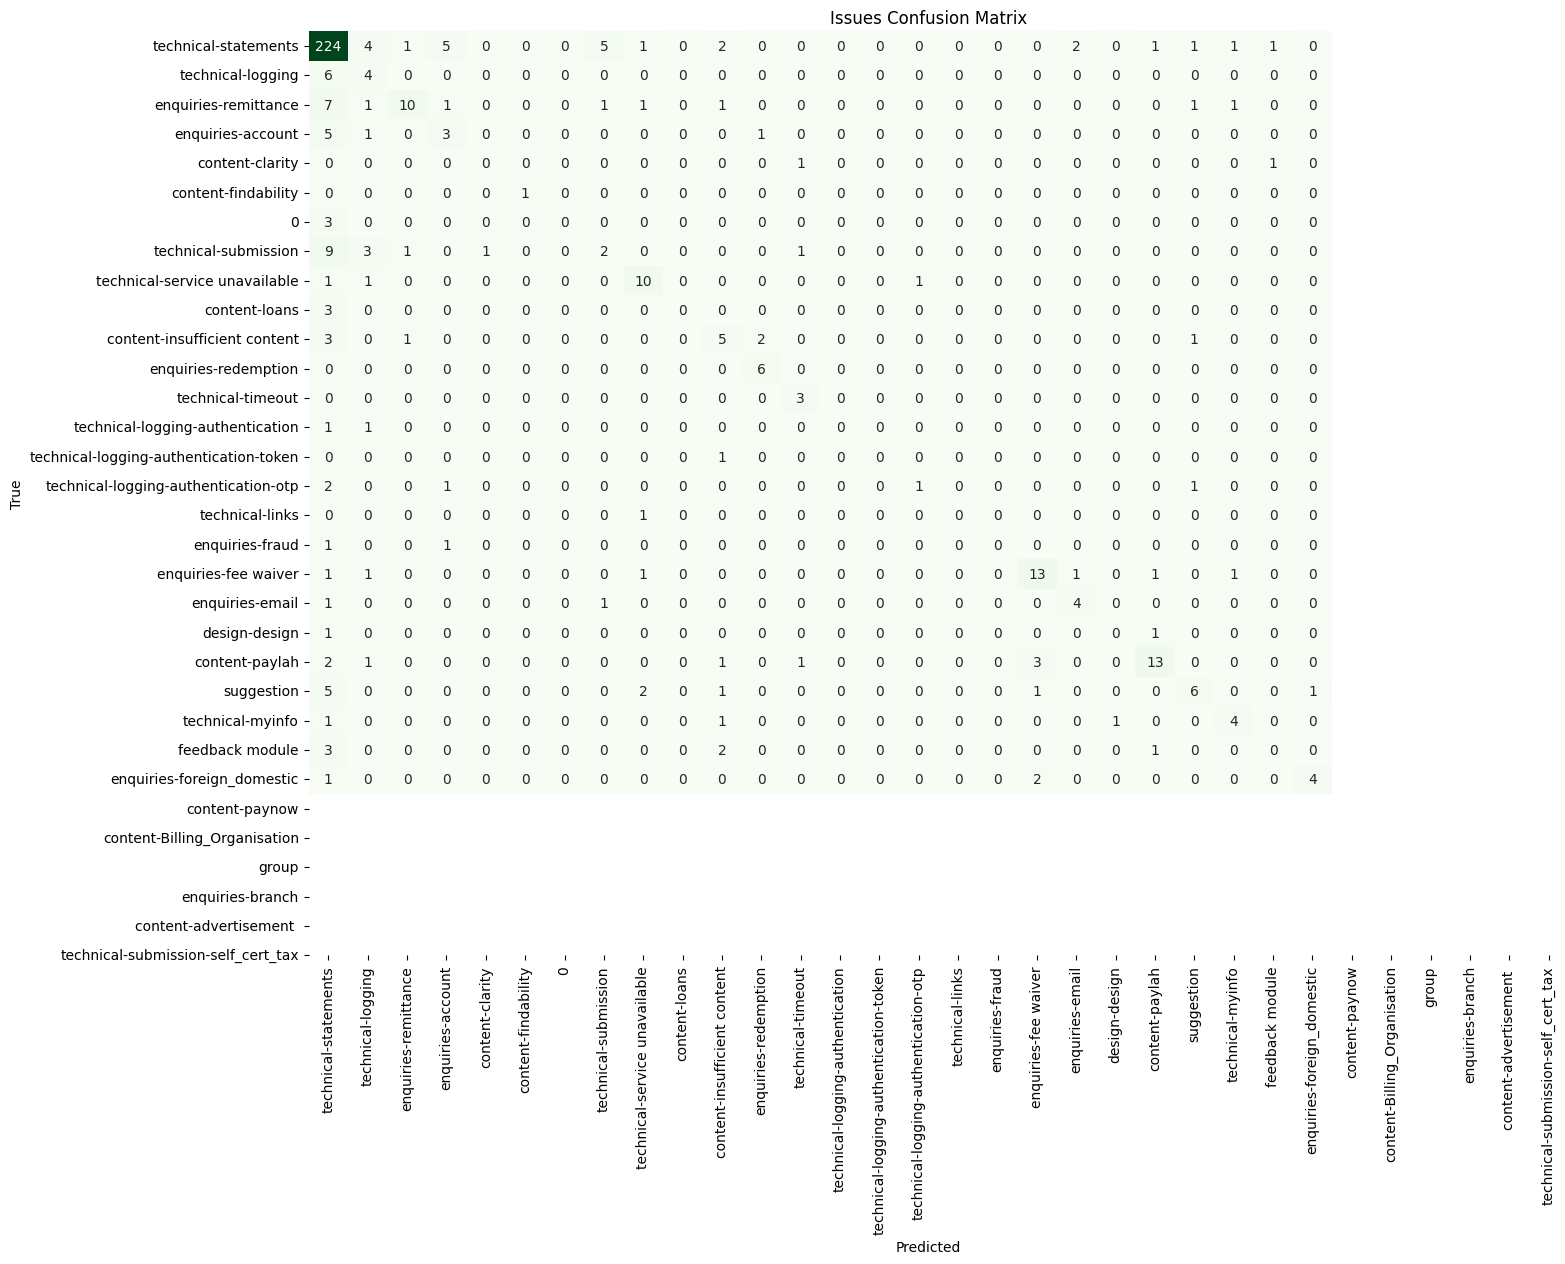

In [25]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Issues Confusion Matrix")
plt.show()

In [46]:
import joblib
# Save the trained model to a file
model_filename = "issues_svm_model.pkl"
joblib.dump(svm_model, model_filename)


['issues_svm_model.pkl']